## Count the amount of green pixels
## Conte a quantidade de pixels verdes

**Answer:** There are **298** green pixels in the image

**Resposta:** Existem **298** pixels verdes na imagem

# How did I get the answer above? Let's code!

## Working with PIL

In [1]:
# Imports
from PIL import Image
from __future__ import print_function

# Open Image
img = Image.open("Syngenta.bmp")

# Converts the image to RGB
img = img.convert(mode='RGB')

# Returns a list of colors used in this image. Returns a list of (count, pixel) values.
print('List of (count, pixel) used in the image:')
print(img.getcolors())

print('\ncolor (96, 192, 0) = green')
print('color (0, 0, 0) = black')
print('color (255, 255, 255) = white')

print('''\nThe image has:
    * 125236 pixels of the color (0, 0, 0) = black
    * 298 pixels of the color (96, 192, 0) = green
    * 466 pixels of the color (255, 255, 255) = white''')

List of (count, pixel) used in the image:
[(466, (255, 255, 255)), (298, (96, 192, 0)), (125236, (0, 0, 0))]

color (96, 192, 0) = green
color (0, 0, 0) = black
color (255, 255, 255) = white

The image has:
    * 125236 pixels of the color (0, 0, 0) = black
    * 298 pixels of the color (96, 192, 0) = green
    * 466 pixels of the color (255, 255, 255) = white


## Working with PIL and numpy

In [2]:
# Imports
from PIL import Image
from __future__ import print_function
import numpy as np

# Open Image and converts the image to RGB
img = Image.open('Syngenta.bmp').convert('RGB')

# Create an numpy array
imageArray = np.array(img)

# Select the unique colors that appears in the array
pixels = np.unique(imageArray.reshape(-1,3), axis=0, return_counts=1)

print('colors used in the image:')
print(pixels[0])

print('''\nThe image has:
    * ''', pixels[1][0], ''' pixels of the color ''', pixels[0][0], ''' = black
    * ''', pixels[1][1], ''' pixels of the color ''', pixels[0][1], ''' = green
    * ''', pixels[1][2], ''' pixels of the color ''', pixels[0][2], ''' = white''')

colors used in the image:
[[  0   0   0]
 [ 96 192   0]
 [255 255 255]]

The image has:
    *  125236  pixels of the color  [0 0 0]  = black
    *  298  pixels of the color  [ 96 192   0]  = green
    *  466  pixels of the color  [255 255 255]  = white


## Working with cv2 and numpy

We can do in two different ways:

In [3]:
## First Way ###

# Imports
import cv2 as cv
import numpy as np

# Reading the image
img = cv.imread('Syngenta.bmp')

# Reshape the array, so it has 3 columns like the BRG
img_reshaped = img.reshape(-1, 3)

# Select the unique colors that appears in the array
unique = np.unique(img_reshaped, axis=0, return_counts=1)

print('Colors used in the image:')
print(unique[0])

print('''\nThe image has:
    * ''', unique[1][0], ''' pixels of the color ''', unique[0][0], ''' = black
    * ''', unique[1][1], ''' pixels of the color ''', unique[0][1], ''' = green
    * ''', unique[1][2], ''' pixels of the color ''', unique[0][2], ''' = white''')

Colors used in the image:
[[  0   0   0]
 [  0 192  96]
 [255 255 255]]

The image has:
    *  125236  pixels of the color  [0 0 0]  = black
    *  298  pixels of the color  [  0 192  96]  = green
    *  466  pixels of the color  [255 255 255]  = white


In [4]:
## Second Way ###

# Imports
import cv2 as cv
import numpy as np

# Reading the image
img = cv.imread('Syngenta.bmp')

# Reshape the array, so it has 3 columns like the BRG
img_reshaped = img.reshape(-1, 3)

# Select the unique colors that appears in the array
unique = np.unique(img_reshaped, axis=0)

# Creating a mask: it's going to be TRUE where the value checks out with the BRG column
mask = (img_reshaped == [0, 192, 96])

# Counting the occurrences of rows that are complete TRUE
green_occurrences = np.count_nonzero(mask.all(axis=1))

print('There are', green_occurrences, 'green pixels')

There are 298 green pixels


## Step by step: attemps of counting the green pixels

In [5]:
# Imports
from PIL import Image
from __future__ import print_function
import numpy as np
import cv2 as cv

#### Working with PIL

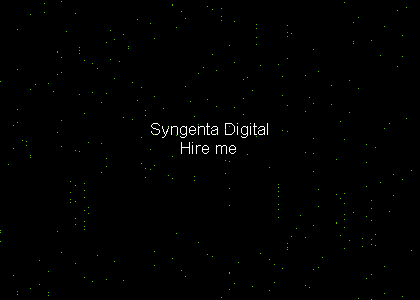

In [6]:
# Open Image
img = Image.open("Syngenta.bmp")
img

In [7]:
img.show()

In [8]:
# Print the file format of the source file.
print(img.format)

BMP


In [9]:
# Print the pixel format used by the image.
print(img.mode)

P


In [10]:
# Image size, in pixels. The size is given as a 2-tuple (width, height).
print(img.size)

(420, 300)


In [11]:
# Returns a list of colors used in this image. Returns a list of (count, pixel) values.
img.getcolors()

[(125236, 0), (298, 51), (466, 255)]

So now we know that the image has:
    * 125236 pixels of the color 0
    * 298 pixels of the color 51
    * 466 pixels of the color 255
    
But we don't understand what these color numbers mean, so in the next cell we will convert the image to RGB. This way we will be able to easily see what color is each one.

In [12]:
img = img.convert(mode='RGB')
print(img.mode)
print(img.getcolors())

RGB
[(466, (255, 255, 255)), (298, (96, 192, 0)), (125236, (0, 0, 0))]


To make our life easier, see what each RGB color means:

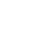

In [13]:
# (255, 255, 255) → white
Image.new(color=(255,255,255), mode='RGB', size=(40,40))

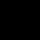

In [14]:
# (0, 0, 0) → black
Image.new(color=(0,0,0), mode='RGB', size=(40,40))

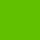

In [15]:
# (96, 192, 0) → green
Image.new(color=(96, 192, 0), mode='RGB', size=(40,40))

At this point, we can infer that there is:
    * 298 green pixels
    * 466 white pixels
    * 125236 black pixels

But, pretending that we don't know, we can scan the image looking for a specific color:

In [16]:
# Counting pixels
count = 0
for y in range(img.height):
    for x in range(img.width):
        pixel = img.getpixel((x, y))
        if pixel == (96, 192, 0):
            count += 1
print('There is', count, 'green pixels')


There is 298 green pixels


#### Working with PIL and numpy

In [17]:
# Put the image into an array
imageArray = np.array(img)

In [18]:
# Reshape array, so it has 3 columns like RGB
imageArrayReshaped = imageArray.reshape(-1,3)

# Select the unique colors that appears in the array
pixels = np.unique(imageArray.reshape(-1,3), axis=0, return_counts=1)

We know from the RGB colors table that:

In [19]:
print('colors used in the image:')
print(pixels[0])

print('\ncolor', pixels[0][0], '= black')
print('color', pixels[0][1], '= green')
print('color', pixels[0][2], '= white')

colors used in the image:
[[  0   0   0]
 [ 96 192   0]
 [255 255 255]]

color [0 0 0] = black
color [ 96 192   0] = green
color [255 255 255] = white


In [20]:
print('''\nThe image has:
    * ''', pixels[1][0], ''' pixels of the color (0, 0, 0) = black
    * ''', pixels[1][1], ''' pixels of the color (96, 192, 0) = green
    * ''', pixels[1][2], ''' pixels of the color (255, 255, 255) = white''')


The image has:
    *  125236  pixels of the color (0, 0, 0) = black
    *  298  pixels of the color (96, 192, 0) = green
    *  466  pixels of the color (255, 255, 255) = white


#### Working with cv2 and numpy - First way

In [21]:
# Reading the image
img = cv.imread('Syngenta.bmp')
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [22]:
# Reshape the array, so it has 3 columns like the BRG
img_reshaped = img.reshape(-1, 3)
img_reshaped

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [23]:
# Select the unique colors that appears in the array
unique = np.unique(img_reshaped, axis=0, return_counts=1)

In [24]:
print('Colors used in the image:')
print(unique[0])

Colors used in the image:
[[  0   0   0]
 [  0 192  96]
 [255 255 255]]


In [25]:
print('''\nThe image has:
    * ''', unique[1][0], ''' pixels of the color ''', unique[0][0], ''' = black
    * ''', unique[1][1], ''' pixels of the color ''', unique[0][1], ''' = green
    * ''', unique[1][2], ''' pixels of the color ''', unique[0][2], ''' = white''')


The image has:
    *  125236  pixels of the color  [0 0 0]  = black
    *  298  pixels of the color  [  0 192  96]  = green
    *  466  pixels of the color  [255 255 255]  = white


#### Working with cv2 and numpy - Second way

In [26]:
# Reading the image
img = cv.imread('Syngenta.bmp')
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [27]:
# Reshape the array, so it has 3 columns like the BRG
img_reshaped = img.reshape(-1, 3)
img_reshaped

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [28]:
# Select the unique colors that appears in the array
unique = np.unique(img_reshaped, axis=0)

print('Colors used in the image:')
print(unique)

Colors used in the image:
[[  0   0   0]
 [  0 192  96]
 [255 255 255]]


In [29]:
# Creating a mask: it's going to be TRUE where the value checks out with the BRG column
# If the row in fully TRUE, than it is the green color
mask = (img_reshaped == [0, 192, 96])
mask

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       ...,
       [ True, False, False],
       [ True, False, False],
       [ True, False, False]])

In [30]:
# Counting the occurrences of rows that are complete TRUE
green_occurrences = np.count_nonzero(mask.all(axis=1))

print('There are', green_occurrences, 'green pixels')

There are 298 green pixels
